In [1]:
#El primer  paso que haremos es installar e importar  las librerias necesarias.
!pip install pandas_datareader #Extrae datos financieros de fuentes en línea
!pip install plotly            #Crea gráficos interactivos y paneles de control.
!pip install yfinance          #Descarga datos históricos del mercado de Yahoo Finance
!pip install sklearn           #Biblioteca de machine learning  para análisis de datos y modelado.
!pip install matplotlib        #Biblioteca de gráficos en 2D para visualizaciones estáticas, animadas e interactivas.

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px

# S&P500

El S&P 500, o Standard & Poor's 500, es un índice del mercado de valores que mide el rendimiento de las 500 empresas más grandes cotizadas en bolsa de valores de los Estados Unidos.\
Representa una amplia sección  de industrias/sectores y se considera ampliamente como un punto de referencia para la salud general del mercado de valores de los Estados Unidos.\
El índice está ponderado por capitalización de mercado, lo que significa que las empresas más grandes tienen un mayor impacto en su valor. Los inversores suelen utilizar el S&P 500 como punto de referencia para evaluar el rendimiento de sus carteras y la economía en general.


In [3]:
DowJones= 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tabla_indice = pd.read_html(DowJones)
tabla_indice


[    Symbol            Security             GICS Sector  \
 0      MMM                  3M             Industrials   
 1      AOS         A. O. Smith             Industrials   
 2      ABT              Abbott             Health Care   
 3     ABBV              AbbVie             Health Care   
 4      ACN           Accenture  Information Technology   
 ..     ...                 ...                     ...   
 498    XYL          Xylem Inc.             Industrials   
 499    YUM         Yum! Brands  Consumer Discretionary   
 500   ZBRA  Zebra Technologies  Information Technology   
 501    ZBH       Zimmer Biomet             Health Care   
 502    ZTS              Zoetis             Health Care   
 
                                 GICS Sub-Industry    Headquarters Location  \
 0                        Industrial Conglomerates    Saint Paul, Minnesota   
 1                               Building Products     Milwaukee, Wisconsin   
 2                           Health Care Equipment  N

In [4]:
tabla_indice[0]['Symbol'].tolist()

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA'

In [5]:
len(tabla_indice[0]['Symbol'].tolist())

503

In [6]:
# Paso 1: Vamos a obtener informacion historica de los precios de cierre de diversas acciones de nuestro interes:
tickers= tabla_indice[0]['Symbol'].tolist()

datos= yf.download(tickers, start="2022-01-01", end="2023-01-01")['Adj Close']


[**********************92%%******************    ]  461 of 503 completed

$BF.B: possibly delisted; No price data found  (1d 2022-01-01 -> 2023-01-01)


[*********************100%%**********************]  503 of 503 completed
ERROR:yfinance:
6 Failed downloads:
ERROR:yfinance:['SOLV', 'VLTO', 'GEV', 'KVUE']: YFChartError("%ticker%: Data doesn't exist for startDate = 1641013200, endDate = 1672549200")
ERROR:yfinance:['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
ERROR:yfinance:['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2022-01-01 -> 2023-01-01)')


In [7]:
datos


Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,154.085464,18.750000,179.481110,122.946861,172.679993,132.760483,44.549999,392.488159,564.369995,169.809113,...,227.957001,35.867710,86.656776,63.231594,58.081875,113.279778,130.186813,123.143150,583.900024,229.051285
2022-01-04,148.876404,19.020000,177.203201,122.710800,170.800003,129.638184,45.130001,389.683350,554.000000,168.275436,...,230.956818,36.327438,86.380318,63.631783,60.266567,114.481491,130.882889,124.392418,587.599976,220.330811
2022-01-05,146.326065,18.680000,172.489609,123.355415,162.250000,129.055710,44.599998,382.820801,514.429993,165.677719,...,229.350449,35.425659,83.181427,64.255348,61.016129,112.921188,129.223740,123.982346,558.179993,211.952911
2022-01-06,146.838089,18.570000,169.610199,122.774353,159.750000,129.036606,44.860001,364.334229,514.119995,166.204910,...,226.766754,35.708572,83.566475,63.752781,62.451267,112.766136,130.558685,122.952415,555.159973,212.794662
2022-01-07,142.928848,19.280001,169.777847,122.456604,166.050003,129.437622,45.070000,357.346313,510.700012,161.843430,...,224.076599,35.664360,83.477615,64.311188,62.963154,111.864876,129.061630,122.208580,530.859985,206.599289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,147.692978,12.710000,130.782578,153.846542,85.250000,105.027534,63.380001,259.968933,338.450012,160.024155,...,239.221451,29.422586,79.696190,67.391136,103.285324,107.724327,125.273804,125.478531,248.220001,143.705795
2022-12-27,148.009689,12.530000,128.967514,153.742767,83.489998,105.406174,63.619999,259.206879,335.089996,158.422348,...,239.407410,29.403898,83.260406,67.999199,104.720367,108.696220,126.245697,126.062874,251.000000,143.252289
2022-12-28,146.564713,12.320000,125.010132,153.025879,82.489998,104.687729,62.599998,257.067230,328.329987,156.547073,...,236.627472,28.619049,79.074188,67.509399,103.000198,106.948761,125.672295,124.785217,246.839996,141.802994


In [8]:
datos.isna().sum() # Checamos si hay datos faltantes

Ticker
A       0
AAL     0
AAPL    0
ABBV    0
ABNB    0
       ..
XYL     0
YUM     0
ZBH     0
ZBRA    0
ZTS     0
Length: 503, dtype: int64

In [9]:
# Paso 2: Calcularemos los returns
returns = datos.pct_change()[1:]

In [10]:
returns

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,-0.033806,0.014400,-0.012692,-0.001920,-0.010887,-0.023518,0.013019,-0.007146,-0.018374,-0.009032,...,0.013160,0.012817,-0.003190,0.006329,0.037614,0.010608,0.005347,0.010145,0.006337,-0.038072
2022-01-05,-0.017131,-0.017876,-0.026600,0.005253,-0.050059,-0.004493,-0.011744,-0.017611,-0.071426,-0.015437,...,-0.006955,-0.024824,-0.037033,0.009800,0.012437,-0.013629,-0.012677,-0.003297,-0.050068,-0.038024
2022-01-06,0.003499,-0.005889,-0.016693,-0.004710,-0.015408,-0.000148,0.005830,-0.048290,-0.000603,0.003182,...,-0.011265,0.007986,0.004629,-0.007821,0.023521,-0.001373,0.010330,-0.008307,-0.005410,0.003971
2022-01-07,-0.026623,0.038234,0.000988,-0.002588,0.039437,0.003108,0.004681,-0.019180,-0.006652,-0.026242,...,-0.011863,-0.001238,-0.001063,0.008759,0.008197,-0.007992,-0.011467,-0.006050,-0.043771,-0.029114
2022-01-10,0.000069,-0.025415,0.000116,0.011195,-0.032159,-0.002213,0.021078,0.006069,0.029626,0.009240,...,0.004578,-0.004710,-0.028149,0.010999,-0.005952,-0.010136,-0.013964,-0.009754,0.008571,0.007153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.001476,0.011943,-0.002798,-0.001041,0.004477,0.001389,0.008433,0.005023,0.005735,0.000549,...,0.008626,0.014171,-0.006401,0.012852,0.026445,-0.000728,0.000621,0.001106,0.002869,0.005033
2022-12-27,0.002144,-0.014162,-0.013878,-0.000675,-0.020645,0.003605,0.003787,-0.002931,-0.009928,-0.010010,...,0.000777,-0.000635,0.044723,0.009023,0.013894,0.009022,0.007758,0.004657,0.011200,-0.003156
2022-12-28,-0.009763,-0.016760,-0.030685,-0.004663,-0.011977,-0.006816,-0.016033,-0.008255,-0.020174,-0.011837,...,-0.011612,-0.026692,-0.050279,-0.007203,-0.016426,-0.016077,-0.004542,-0.010135,-0.016574,-0.010117


#Serie de tiempo para Returns

In [11]:
import random
accion_aleatoriaSYP500  = random.sample(tickers , 3)
accion_aleatoriaSYP500


['ANET', 'KVUE', 'WFC']

In [12]:

fig = px.line(returns, x=returns.index, y=accion_aleatoriaSYP500, labels={'index': 'Fecha', 'Valor': 'Returns'}, #Aqui le asignamos a nuestra grafica los valores que va a graficar,en este caso fecha y returns.
              title='Retornos Diarios de las Acciones Seleccionadas', line_shape='linear', render_mode='svg') #Indicamos titulo ,forma.
# Diseñamos un boton para observar desde diferentes periodos del año.
fig.update_layout(              #Nos sirve para editar el layaout=diseño del gráfico.
    xaxis=dict(                 #Indicamos como consiguraremos el eje X
        rangeselector=dict(     #Asignamos el rango en el que se podra seleccionar nuestro eje X
            buttons=list([      #Definimos los botones de nuestra grafica asi como el tamaño o raango de los saltos de tiempo.
                dict(count=1, label="1m", step="month", stepmode="backward"), #En este caso stepmode nos indica que queremos el tiempo restante de nuestra selección.
                dict(count=3, label="3m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
            ])
        ),
        rangeslider=dict(visible=True), #Indicamos que queremos ver la barra inferior de movimiento
        type="date"
    )
)
fig.show()    #Con este comando mostramos la gráfica.

Volatilidad

In [13]:
volatilidad = returns.std()
variables = pd.DataFrame({'Returns': returns.mean(), 'Volatilidad': volatilidad}).dropna()

In [14]:
variables

,Returns,Volatilidad
Ticker,,
A,0.000094,0.022288
AAL,-0.000925,0.035447
AAPL,-0.001074,0.022471
ABBV,0.000961,0.014129
ABNB,-0.002077,0.038123
...,...,...
XYL,0.000074,0.022137
YUM,-0.000064,0.015187
ZBH,0.000285,0.019244


#Estandarización de los datos
La estandarización en la gestión de carteras de inversión es necesaria por lo siguiente:\
Permite la comparación directa de activos financieros al expresarlos en desviaciones estándar con respecto a la media, facilitando así la comparabilidad entre diferentes escalas y unidades.\
 Además, simplifica el análisis y la visualización de datos, haciendo que gráficos y métricas sean más interpretables y comparables.\
  La estandarización también mitiga sesgos derivados de diferencias en volatilidad o rendimientos, especialmente crucial al evaluar activos con rangos de precios distintos.\
  En el marco de la teoría moderna de carteras, la estandarización es crucial para garantizar una contribución coherente de cada activo en términos de riesgo y rendimiento en los cálculos de optimización, cumpliendo con las suposiciones de normalidad y escalas comunes en modelos matemáticos y estadísticos,esto es muchos de los modelos asumen tener datos estandarizados y al no ser de esta forma podrian obtenerse errores.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

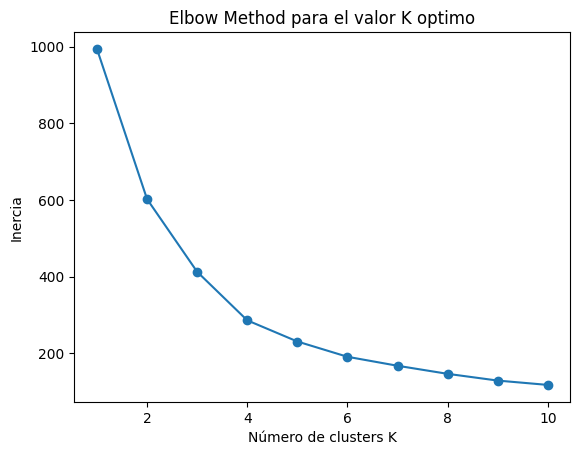

In [15]:
volatilidad = returns.std() #Estandarizamos los datos
#Se crea el DF con los datos a agrupar.
variables = pd.DataFrame({'Returns': returns.mean(), 'Volatilidad': volatilidad}).dropna()
#Estandarizamos todo el DF
scaler = StandardScaler()
scaled_variables = scaler.fit_transform(variables)
#  Elbow Method (Metodo del codo)
inertia = []  # Almacenara la inercia (suma de cuadrados dentro del clúster) para cada k.
max_clusters = 10  # Definimos cuanto es lo máximo de cluster que queremos o deberia calcular.
for k in range(1, max_clusters + 1):                  #Iteremos en base al # de clusters hasta llegar al 10 maximo.
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_variables)
    inertia.append(kmeans.inertia_)
#Una vez calculado el algoritmo elbow lo graficamos o buscamos el punto de decrecimiento.
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.title('Elbow Method para el valor K optimo')
plt.xlabel('Número de clusters K')
plt.ylabel('Inercia')
plt.show()

In [16]:
#Importamos  ahora las funciones de machine learnig de la maqueteria sklearn necesarias
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Vamos a estandarizar las variables(features) que en este caso son la volatilidad y los returns.
scaler = StandardScaler()
scaled_variables = scaler.fit_transform(variables)

# Ahora procederemos con el primer paso del algoritmo que es seleccionar el número K de cluster
# En este caso seleccionaremos arbitrariamente 5
num_clusters = 4

# Ejecutamos el Algoritmo K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)  #Ejecutamos la función ,Establecer un estado aleatorio específico garantiza la reproducibilidad de los resultados.
#                                               # Si ejecutas el mismo código con el mismo estado aleatorio, se deberian  obtener los mismos resultados.
variables['Cluster'] = kmeans.fit_predict(scaled_variables) #Agregamos la columna Cluster al df original dado por la función del algoritmo K-Means

# Una vez realizado proyectamos que acciones fueron asignadas a cada uno de los K clusters
print(variables)

         Returns  Volatilidad  Cluster
Ticker                                
A       0.000094     0.022288        0
AAL    -0.000925     0.035447        2
AAPL   -0.001074     0.022471        0
ABBV    0.000961     0.014129        1
ABNB   -0.002077     0.038123        2
...          ...          ...      ...
XYL     0.000074     0.022137        0
YUM    -0.000064     0.015187        1
ZBH     0.000285     0.019244        1
ZBRA   -0.002854     0.029276        2
ZTS    -0.001639     0.020090        0

[497 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



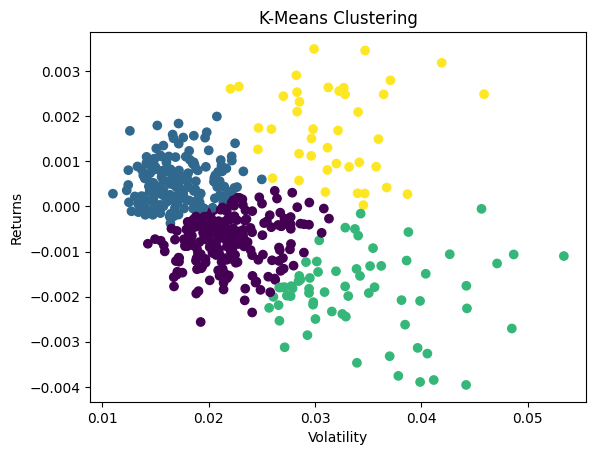

In [17]:
plt.scatter(variables['Volatilidad'], variables['Returns'], c=variables['Cluster'], cmap='viridis')

plt.title('K-Means Clustering')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-18-fe302e50bafe>:16: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



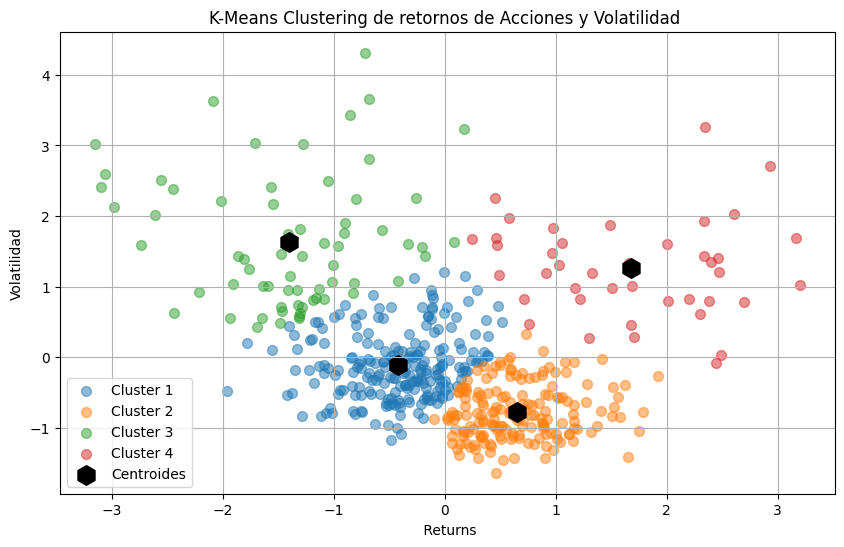

In [18]:
# Indicamos el número de clusters correspondientes
num_clusters = 4

# Ejecutamos el Algoritmo K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
variables['Cluster'] = kmeans.fit_predict(scaled_variables)

plt.figure(figsize=(10, 6))        #Seleccionamos el tamaño del grafica/figura

# Creamos un diccionario para las etiquetas del número del clúster.
cluster_names = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4'}

#Graficamos las observaciones obtenidas
for i in range(num_clusters):  #Iteramos sobre cada cluster para graficar todos sus puntos correspondientes dentro de cada cluster.
    cluster_data = scaled_variables[variables['Cluster'] == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=cluster_names[i], cmap='viridis', s=50, alpha=0.5)

# Agregamos los centroides encontrados
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='h', s=200, label='Centroides') #Creamos el grafico de dispersión de los datos.

# Añadimos titulos y etiquetas al grafico (ejes)
plt.title('K-Means Clustering de retornos de Acciones y Volatilidad ')
plt.xlabel(' Returns')
plt.ylabel('Volatilidad')
plt.legend() #Etiqueta de clusters y centroides
plt.grid(True)
plt.show() #Mostramos la grafica



*   Los distintos clusters agrupan activos financieros con patrones similares de riesgo y rendimiento.
*  Un cluster puede incluir activos de alto rendimiento y volatilidad, mientras que otro contiene activos con rendimiento moderado y baja volatilidad.
*   Los gestores de portafolios de inversión utilizan este gráfico para seleccionar activos alineados con sus preferencias de riesgo y rendimiento.
*  La diversificación del portafolio se aborda al invertir en activos poco correlacionados, mitigando el riesgo.



